# PCA of FOU and OAall

**Author:** Jesse Marks <br>
**GitHub:** [Issue 140](https://github.com/RTIInternational/bioinformatics/issues/140) <br>

This notebook documents a principal components analysis (PCA) for the phenotypes frequency of use (FOU) and opioid addiction case vs control (OAall). We are trying to determine if there are any inherent differences between the individual constituent cohorts for each phenotype. We will perform the analysis by taking a subset of the SNPs that we present in the individual GWASs. Specifically, we will filter to the most siginificant SNPs for each GWAS that had a pvalue of < 0.001. We take the Union set of these SNPs for the PCA. The minor allele freqency for each SNP will be used in the PCA. We will plot the results with python. See [this video by Josh Starmer](https://www.youtube.com/watch?v=Lsue2gEM9D0) for an example of how to perform a PCA using Python.

**Data Location:**
FOU meta: s3://rti-midas-data/studies/ngc/meta/087/processing/fou/alive+cats+cogend+start+uhs1-4+vidus+yale-penn.ea.fou.chr1.maf_gt_0.01.rsq_gt_0.3.gz <br>
FOU meta: s3://rti-midas-data/studies/ngc/meta/089/processing/oaall/cats+coga+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr1.maf_gt_0.01.rsq_gt_0.3.gz

### OAall Locations

- CATS-MOLE
    - OAall: s3://rti-midas-data/studies/ngc/cats/association_tests/010/ea/oaall/catsmole.ea.oaall.chr{1..22}.1000g_ids.maf_gt_0.01_eur_cats.rsq_gt_0.3.gz
- CATS-PERHUNT
    - OAall: s3://rti-midas-data/studies/ngc/cats/association_tests/011/ea/oaall/catsperthunt.ea.oaall.chr{1..22}.1000g_ids.maf_gt_0.01_eur_cats.rsq_gt_0.3.gz
- COGA
    - OAall s3://rti-midas-data/studies/ngc/coga/association_tests/001/ea/oaall/coga.ea.oaall.chr{1..22}.1000g_ids.maf_gt_0.01_eur_coga.se.rsq_gt_0.3.gz
- Kreek
    - OAall: s3://rti-midas-data/studies/ngc/kreek/association_tests/003/ea/oaall/kreek.ea.oaall.chr{1..22}.1000g_ids.maf_gt_0.01_eur_kreek.rsq_gt_0.3.gz
- Bulgaria
    - OAall:  s3://rti-heroin/gwas/op_dep_bulgaria/results/oaall/0001/mis_minimac4_eagle2.4/1000g_p3/eur/chr{1..22}.1000g_ids.maf_gt_0.01_eur_obd.rsq_gt_0.3.gz
- VIDUS
    - OAall:  s3://rti-midas-data/studies/ngc/vidus/association_tests/002/ea/oaall/vidus.ea.oaall.chr{1..22}.1000g_ids.maf_gt_0.01_eur_vidus.se.rsq_gt_0.3.gz
- Yale-Penn-CIDR
    - OAall:  s3://rti-midas-data/studies/ngc/yale-penn/association_tests/004/ea/oaall/yale-penn.cidr.ea.chr{1..22}.1000g_ids.maf_gt_0.01_eur_yale-penn.rsq_gt_0.3.gz
- Yale-Penn-GO
    - OAall:  s3://rti-midas-data/studies/ngc/yale-penn/association_tests/005/ea/oaall/yale-penn.go.ea.chr{1..22}.1000g_ids.maf_gt_0.01_eur_yale-penn.rsq_gt_0.3.gz
- UHS1
    - OAall:  s3://rti-midas-data/studies/ngc/uhs1/association_tests/002/ea/oaall/uhs1.ea.oaall.chr{1..22}.1000g_ids.maf_gt_0.01_eur_uhs1.rsq_gt_0.3.gz
- deCODE OAall (N=275468‬)
    - OAall:  s3://rti-midas-data/studies/ngc/decode/association_tests/001/ea/oaall/decode.ea.oaall.chr{1..22}.1000g_ids.maf_gt_0.01_eur_decode.beta_se.rsq_gt_0.3.gz
- deCODE OAexp (N=2581)
    - OAexp:  s3://rti-midas-data/studies/ngc/decode/association_tests/002/ea/oaexp/decode.ea.oaexp.chr{1..22}.1000g_ids.maf_gt_0.01_eur_decode.beta_se.rsq_gt_0.3.gz
    
### FOU Locations
    
- ALIVE
    - FOU GWAS: rti-midas-data/studies/ngc/alive/association_tests
- CATS
    - FOU GWAS: 
- COGEND
    - FOU GWAS: 
- START
    - FOU GWAS: 
- UHS1–4
    - FOU GWAS: 
- VIDUS
    - FOU GWAS: s3://rti-midas-data/studies/ngc/vidus/association_tests/001/ea/fou/vidus.ea.fou.chr22.1000g_ids.maf_gt_0.01_eur_vidus.se.rsq_gt_0.3.gz 
- Yale-Penn
    - FOU GWAS:


## Data Wrangling
### OAall

In [ ]:
## create pvalue-filtered list (<0.001) from GWAS results ##

## VIDUS ##
cd /shared/jmarks/heroin/pca/oaall/vidus
for chr in {1..22}; do
    aws s3 cp s3://rti-midas-data/studies/ngc/vidus/association_tests/002/ea/oaall/vidus.ea.oaall.chr$chr.1000g_ids.maf_gt_0.01_eur_vidus.se.rsq_gt_0.3.gz . --quiet
done &

for chr in {1..22}; do
    awk '$17 <= 0.001 {print $1}' <(zcat vidus.ea.oaall.chr$chr.1000g_ids.maf_gt_0.01_eur_vidus.se.rsq_gt_0.3.gz) >> ../vidus_oaall_p_le_0.001
done &


## UHS ##
cd /shared/jmarks/heroin/pca/oaall/uhs
for chr in {1..22}; do
    aws s3 cp s3://rti-midas-data/studies/ngc/uhs1/association_tests/002/ea/oaall/uhs1.ea.oaall.chr$chr.1000g_ids.maf_gt_0.01_eur_uhs1.rsq_gt_0.3.gz . --quiet 
done &

for chr in {1..22}; do
    awk '$17 <= 0.001 {print $1}' <(zcat uhs1.ea.oaall.chr$chr.1000g_ids.maf_gt_0.01_eur_uhs1.rsq_gt_0.3.gz) >> ../uhs1_oaall_p_le_0.001
done &


## CATS-MOLE ##
cd /shared/jmarks/heroin/pca/oaall/catsmole
for chr in {1..22}; do
    aws s3 cp s3://rti-midas-data/studies/ngc/cats/association_tests/010/ea/oaall/catsmole.ea.oaall.chr$chr.1000g_ids.maf_gt_0.01_eur_cats.rsq_gt_0.3.gz . --quiet 
done &

for chr in {1..22}; do
    awk '$18 <= 0.001 {print $1}' <(zcat catsmole.ea.oaall.chr$chr.1000g_ids.maf_gt_0.01_eur_cats.rsq_gt_0.3.gz) >> ../catsmole_oaall_p_le_0.001
done &


## CATS-PERTHUNT
s3://rti-midas-data/studies/ngc/cats/association_tests/011/ea/oaall/catsperthunt.ea.oaall.chr$chr.1000g_ids.maf_gt_0.01_eur_cats.rsq_gt_0.3.gz

for chr in {1..22};do
    awk '$18 <= 0.001 {print $1}' <(zcat catsperthunt.ea.oaall.chr$chr.1000g_ids.maf_gt_0.01_eur_cats.rsq_gt_0.3.gz) >> ../catsperthunt_oaall_p_le_0.001
done



## COGA ##
s3://rti-midas-data/studies/ngc/coga/association_tests/001/ea/oaall/coga.ea.oaall.chr$chr.1000g_ids.maf_gt_0.01_eur_coga.se.rsq_gt_0.3.gz

for chr in {1..22};do
    awk '$17 <= 0.001 {print $1}' <(zcat coga.ea.oaall.chr$chr.1000g_ids.maf_gt_0.01_eur_coga.se.rsq_gt_0.3.gz) >> ../coga_oaall_p_le_0.001
done
    
    
## Kreek ##
s3://rti-midas-data/studies/ngc/kreek/association_tests/003/ea/oaall/kreek.ea.oaall.chr$chr.1000g_ids.maf_gt_0.01_eur_kreek.rsq_gt_0.3.gz
    
for chr in {1..22};do
    awk '$18 <= 0.001 {print $1}' <(zcat kreek.ea.oaall.chr$chr.1000g_ids.maf_gt_0.01_eur_kreek.rsq_gt_0.3.gz) >> ../kreek_oaall_p_le_0.001
done

    
    
    
## Bulgaria ##
s3://rti-heroin/gwas/op_dep_bulgaria/results/oaall/0001/mis_minimac4_eagle2.4/1000g_p3/eur/chr$chr.1000g_ids.maf_gt_0.01_eur_obd.rsq_gt_0.3.gz

for chr in {1..22};do
    awk '$18 <= 0.001 {print $1}' <(zcat chr$chr.1000g_ids.maf_gt_0.01_eur_obd.rsq_gt_0.3.gz) >> ../bulgaria_oaall_p_le_0.001
done
    
## Yale-Penn CIDR ##
s3://rti-midas-data/studies/ngc/yale-penn/association_tests/004/ea/oaall/yale-penn.cidr.ea.chr$chr.1000g_ids.maf_gt_0.01_eur_yale-penn.rsq_gt_0.3.gz
    
for chr in {1..22};do
    awk '$20 <= 0.001 {print $1}' <(zcat yale-penn.cidr.ea.chr$chr.1000g_ids.maf_gt_0.01_eur_yale-penn.rsq_gt_0.3.gz) >> ../yp_cidr_oaall_p_le_0.001
done &
    
    
    
## Yale-Penn GO    
s3://rti-midas-data/studies/ngc/yale-penn/association_tests/005/ea/oaall/yale-penn.go.ea.chr$chr.1000g_ids.maf_gt_0.01_eur_yale-penn.rsq_gt_0.3.gz

for chr in {1..22};do
    awk '$20 <= 0.001 {print $1}' <(zcat yale-penn.go.ea.chr$chr.1000g_ids.maf_gt_0.01_eur_yale-penn.rsq_gt_0.3.gz) >> ../yp_go_oaall_p_le_0.001
done

## deCODE 
s3://rti-midas-data/studies/ngc/decode/association_tests/001/ea/oaall/decode.ea.oaall.chr$chr.1000g_ids.maf_gt_0.01_eur_decode.beta_se.rsq_gt_0.3.gz
    
for chr in {1..22};do
    awk '$9 <= 0.001 {print $1}' <(zcat decode.ea.oaall.chr$chr.1000g_ids.maf_gt_0.01_eur_decode.beta_se.rsq_gt_0.3.gz) > ../decode_oaall_p_le_0.001
done
    
## deCODE OAexp
s3://rti-midas-data/studies/ngc/decode/association_tests/002/ea/oaexp/decode.ea.oaexp.chr$chr.1000g_ids.maf_gt_0.01_eur_decode.beta_se.rsq_gt_0.3.gz
    
for chr in {1..22};do
    awk '$9 <= 0.001 {print $1}' <(zcat decode.ea.oaexp.chr$chr.1000g_ids.maf_gt_0.01_eur_decode.beta_se.rsq_gt_0.3.gz) > ../decode_oaexp_p_le_0.001
done

In [ ]:
## get union set
cd /shared/jmarks/heroin/pca/oaall/002
cat *1  | sort  | uniq > oaall_union_snps_p_le_0.001

In [ ]:
## python3 ##
## snps_in_cohorts.py
## compile list of SNPs available in cohorts from the combined list ##


#chr1.1000g_ids.maf_gt_0.01_eur_obd.rsq_gt_0.3.gz bulgaria
#catsmole.ea.oaall.chr18.1000g_ids.maf_gt_0.01_eur_cats.rsq_gt_0.3.gz
#catsperthunt.ea.oaall.chr18.1000g_ids.maf_gt_0.01_eur_cats.rsq_gt_0.3.gz
#coga.ea.oaall.chr2.1000g_ids.maf_gt_0.01_eur_coga.se.rsq_gt_0.3.gz
#decode.ea.oaall.chr7.1000g_ids.maf_gt_0.01_eur_decode.beta_se.rsq_gt_0.3.gz
#decode.ea.oaexp.chr22.1000g_ids.maf_gt_0.01_eur_decode.beta_se.rsq_gt_0.3.gz
#kreek.ea.oaall.chr22.1000g_ids.maf_gt_0.01_eur_kreek.rsq_gt_0.3.gz
#uhs1.ea.oaall.chr13.1000g_ids.maf_gt_0.01_eur_uhs1.rsq_gt_0.3.gz
#vidus.ea.oaall.chr3.1000g_ids.maf_gt_0.01_eur_vidus.se.rsq_gt_0.3.gz
#yale-penn.cidr.ea.chr2.1000g_ids.maf_gt_0.01_eur_yale-penn.rsq_gt_0.3.gz
#yale-penn.go.ea.chr22.1000g_ids.maf_gt_0.01_eur_yale-penn.rsq_gt_0.3.gz

import gzip
results_files = ["../data/bulgaria/chr{}.1000g_ids.maf_gt_0.01_eur_obd.rsq_gt_0.3.gz",
                "../data/catsmole/catsmole.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_cats.rsq_gt_0.3.gz",
                "../data/catsperthunt/catsperthunt.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_cats.rsq_gt_0.3.gz",
                "../data/coga/coga.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_coga.se.rsq_gt_0.3.gz",
                "../data/decode_oaall/decode.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_decode.beta_se.rsq_gt_0.3.gz",
                "../data/decode_oaexp/decode.ea.oaexp.chr{}.1000g_ids.maf_gt_0.01_eur_decode.beta_se.rsq_gt_0.3.gz",
                "../data/kreek/kreek.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_kreek.rsq_gt_0.3.gz",
                "../data/uhs/uhs1.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_uhs1.rsq_gt_0.3.gz",
                "../data/vidus/vidus.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_vidus.se.rsq_gt_0.3.gz",
                "../data/yp_cidr/yale-penn.cidr.ea.chr{}.1000g_ids.maf_gt_0.01_eur_yale-penn.rsq_gt_0.3.gz",
                "../data/yp_go/yale-penn.go.ea.chr{}.1000g_ids.maf_gt_0.01_eur_yale-penn.rsq_gt_0.3.gz" ]

infile = "oaall_union_snps_p_le_0.001"
#outfile = "bulgaria_intersection_with_combined_snps_p_le_0.001"
#outfile = "catsmole_intersection_with_combined_snps_p_le_0.001"
#outfile = "catsperthunt_intersection_with_combined_snps_p_le_0.001"
#outfile = "coga_intersection_with_combined_snps_p_le_0.001"
#outfile = "decode_oaall_intersection_with_combined_snps_p_le_0.001"
#outfile = "decode_oaexp_intersection_with_combined_snps_p_le_0.001"
#outfile = "kreek_intersection_with_combined_snps_p_le_0.001"
#outfile = "uhs1_intersection_with_combined_snps_p_le_0.001"
#outfile = "vidus_intersection_with_combined_snps_p_le_0.001"
#outfile = "yp_cidr_intersection_with_combined_snps_p_le_0.001"
#outfile = "yp_go_intersection_with_combined_snps_p_le_0.001"
with open(infile) as inF, open(outfile, "w") as outF:
    line = inF.readline()
    combined_set = set()
    while line:
        sl = line.split()
        combined_set.add(sl[0])
        line = inF.readline()

    for chrom in range(1, 23):
        cohort_file = "../data/bulgaria/chr1.1000g_ids.maf_gt_0.01_eur_obd.rsq_gt_0.3.gz".format(chrom)
        with gzip.open(cohort_file, "rt") as cF:
            chead = cF.readline()
            cline = cF.readline()
            while cline:
                sl = cline.split()
                if sl[0] in combined_set:
                    outF.write(sl[0] + "\n")
                cline = cF.readline()

                

In [ ]:
# get intersection now
cat *intersection* | sort | uniq -dc | awk '$1==11 {print $2}' > final_intersection_set.txt

In [ ]:
## python3
## final_intersection.py
## compile list of SNPs available in cohorts from the combined list ##
import gzip


results_files = ["../data/bulgaria/chr{}.1000g_ids.maf_gt_0.01_eur_obd.rsq_gt_0.3.gz",
                "../data/catsmole/catsmole.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_cats.rsq_gt_0.3.gz",
                "../data/catsperthunt/catsperthunt.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_cats.rsq_gt_0.3.gz",
                "../data/coga/coga.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_coga.se.rsq_gt_0.3.gz",
                "../data/decode_oaall/decode.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_decode.beta_se.rsq_gt_0.3.gz",
                "../data/decode_oaexp/decode.ea.oaexp.chr{}.1000g_ids.maf_gt_0.01_eur_decode.beta_se.rsq_gt_0.3.gz",
                "../data/kreek/kreek.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_kreek.rsq_gt_0.3.gz",
                "../data/uhs/uhs1.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_uhs1.rsq_gt_0.3.gz",
                "../data/vidus/vidus.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_vidus.se.rsq_gt_0.3.gz",
                "../data/yp_cidr/yale-penn.cidr.ea.chr{}.1000g_ids.maf_gt_0.01_eur_yale-penn.rsq_gt_0.3.gz",
                "../data/yp_go/yale-penn.go.ea.chr{}.1000g_ids.maf_gt_0.01_eur_yale-penn.rsq_gt_0.3.gz" ]
 
infile = "final_intersection_set.txt"
outfiles = ["final/bulgaria_final_intersection_snps_p_le_0.001.tsv",
           "final/catsmole_final_intersection_snps_p_le_0.001.tsv",
           "final/catsperthunt_final_intersection_snps_p_le_0.001.tsv",
           "final/coga_final_intersection_snps_p_le_0.001.tsv",
           "final/decode_oaall_final_intersection_snps_p_le_0.001.tsv",
           "final/decode_oaexp_final_intersection_snps_p_le_0.001.tsv",
           "final/kreek_final_intersection_snps_p_le_0.001.tsv",
           "final/uhs1_final_intersection_snps_p_le_0.001.tsv",
          "final/vidus_final_intersection_snps_p_le_0.001.tsv",
           "final/yp_cidr_final_intersection_snps_p_le_0.001.tsv",
           "final/yp_go_final_intersection_snps_p_le_0.001.tsv"]

for outfile, results in zip(outfiles, results_files):
    with open(infile) as inF, open(outfile, "w") as outF:
        line = inF.readline()
        combined_set = set()
        while line:
            sl = line.split()
            combined_set.add(sl[0])
            line = inF.readline()

        for chrom in range(1, 23):
            cohort_file = results.format(chrom)
            with gzip.open(cohort_file, "rt") as cF:
                chead = cF.readline()
                cline = cF.readline()
                while cline:
                    sl = cline.split()
                    rsid = sl[0]
                    af = sl[6]
                    new_line = "{}\t{}\n".format(rsid, af)
                    if rsid in combined_set:
                        outF.write(new_line)
                    cline = cF.readline()


In [ ]:
# merge data
paste <(awk 'BEGIN{OFS="\t";} {print $1, $2}' bulgaria_final_intersection_snps_p_le_0.001_maf.tsv.sorted) \
    <(awk '{print $2}' catsmole_final_intersection_snps_p_le_0.001_maf.tsv.sorted) \
    <(awk '{print $2}' catsperthunt_final_intersection_snps_p_le_0.001_maf.tsv.sorted) \
    <(awk '{print $2}' coga_final_intersection_snps_p_le_0.001_maf.tsv.sorted) \
    <(awk '{print $2}' decode_oaall_final_intersection_snps_p_le_0.001_maf.tsv.sorted) \
    <(awk '{print $2}' decode_oaexp_final_intersection_snps_p_le_0.001_maf.tsv.sorted) \
    <(awk '{print $2}' kreek_final_intersection_snps_p_le_0.001_maf.tsv.sorted) \
    <(awk '{print $2}' uhs1_final_intersection_snps_p_le_0.001_maf.tsv.sorted) \
    <(awk '{print $2}' vidus_final_intersection_snps_p_le_0.001_maf.tsv.sorted) \
    <(awk '{print $2}' yp_cidr_final_intersection_snps_p_le_0.001_maf.tsv.sorted) \
    <(awk '{print $2}' yp_go_final_intersection_snps_p_le_0.001_maf.tsv.sorted) \
    > combined_final_intersection_snps_p_le_0.001.tsv


# create header with vim (head.txt) SNP catsmole uhs1 vidus
cat head.txt combined_final_intersection_snps_p_le_0.001.tsv > final_oaall_table.tsv

In [ ]:
results_files = ["../data/bulgaria/chr{}.1000g_ids.maf_gt_0.01_eur_obd.rsq_gt_0.3.gz",
                "../data/catsmole/catsmole.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_cats.rsq_gt_0.3.gz",
                "../data/catsperthunt/catsperthunt.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_cats.rsq_gt_0.3.gz",
                "../data/coga/coga.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_coga.se.rsq_gt_0.3.gz",
                "../data/decode_oaall/decode.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_decode.beta_se.rsq_gt_0.3.gz",
                "../data/decode_oaexp/decode.ea.oaexp.chr{}.1000g_ids.maf_gt_0.01_eur_decode.beta_se.rsq_gt_0.3.gz",
                "../data/kreek/kreek.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_kreek.rsq_gt_0.3.gz",
                "../data/uhs/uhs1.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_uhs1.rsq_gt_0.3.gz",
                "../data/vidus/vidus.ea.oaall.chr{}.1000g_ids.maf_gt_0.01_eur_vidus.se.rsq_gt_0.3.gz",
                "../data/yp_cidr/yale-penn.cidr.ea.chr{}.1000g_ids.maf_gt_0.01_eur_yale-penn.rsq_gt_0.3.gz",
                "../data/yp_go/yale-penn.go.ea.chr{}.1000g_ids.maf_gt_0.01_eur_yale-penn.rsq_gt_0.3.gz" ]

outfiles = [ "final/bulgaria_final_intersection_snps_p_le_0.001.tsv",
           "final/catsmole_final_intersection_snps_p_le_0.001.tsv",
           "final/catsperthunt_final_intersection_snps_p_le_0.001.tsv",
           "final/coga_final_intersection_snps_p_le_0.001.tsv",
           "final/decode_oaall_final_intersection_snps_p_le_0.001.tsv",
           "final/decode_oaexp_final_intersection_snps_p_le_0.001.tsv",
           "final/kreek_final_intersection_snps_p_le_0.001.tsv",
           "final/uhs1_final_intersection_snps_p_le_0.001.tsv",
          "final/vidus_final_intersection_snps_p_le_0.001.tsv",
           "final/yp_cidr_final_intersection_snps_p_le_0.001.tsv",
           "final/yp_go_final_intersection_snps_p_le_0.001.tsv"]

#def switch_maf(outfile):
#    switcher={
#        0:"hi",
#        1:"ho"
#    }
#    return switcher.get(i, "Invalid")
#switch_maf(0)
def switcher_maf(i):
    switcher={
            1:'7',
            2:'7',
            3:'7',
            4:'6',
            5:'5',
            6:'5',
            7:'7',
            8:'6',
            9:'6',
            10:'6',
            12:'6',
            11:'11 ',
            12: '11'
         }
    return switcher.get(i,"Invalid day of week")
outfiles[int(switcher_maf(12))]
#
#for outfile, results in zip(outfiles, results_files):
#        print(outfile, results)
    

In [ ]:
### R ###

df <- read.table("final_oaall_table.tsv", header=TRUE, row.names=1)
head(df)

# take transpose since prcomp expects samples in the rows
pca_data <- prcomp(t(df))
summary(pca_data)
# extract this information from summary
xlab <- "PC1 (42.14%)"
ylab <- "PC3 (13.65%)"

png(file="oaall_pca_1_3.png")
plot(pca_data$x[,1], pca_data$x[,3], col="black", cex=0.2, xlab= xlab, ylab=ylab)
text(pca_data$x[,1], pca_data$x[,3], labels=rownames(pca_data$x))
dev.off()

write.table()

```
> summary(pca_data)
Importance of components%s:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     3.0587 2.1569 1.7410 1.6233 1.03533 0.92089 0.56642
Proportion of Variance 0.4214 0.2095 0.1365 0.1187 0.04828 0.03819 0.01445
Cumulative Proportion  0.4214 0.6309 0.7674 0.8861 0.93437 0.97257 0.98702
                           PC8     PC9      PC10      PC11
Standard deviation     0.40832 0.34858 1.051e-14 5.713e-15
Proportion of Variance 0.00751 0.00547 0.000e+00 0.000e+00
Cumulative Proportion  0.99453 1.00000 1.000e+00 1.000e+00
```

In [ ]:
## download to local
cd ~/Projects/heroin/ngc/pca/oaall/003
scp -i ~/.ssh/gwas_rsa    ec2-user@34.195.174.206:/shared/jmarks/heroin/pca/oaall/003/final/oaall_pca_summary.txt

### PCA plot in python

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


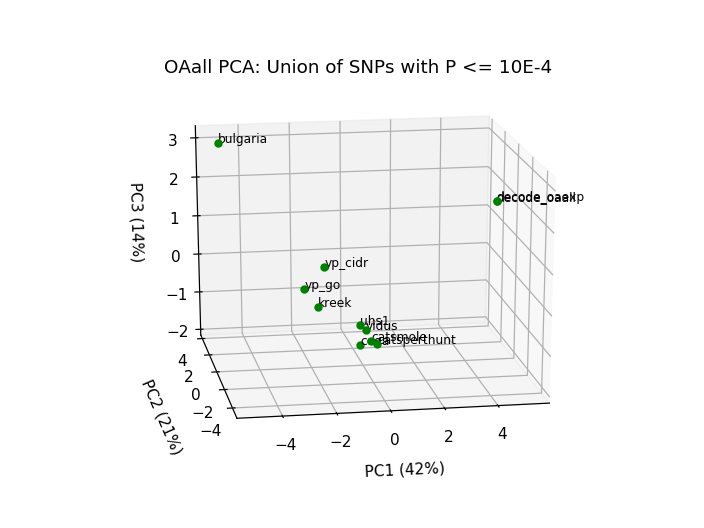

bulgaria
catsmole
catsperthunt
coga
decode_oaall
decode_oaexp
kreek
uhs1
vidus
yp_cidr
yp_go


In [3]:
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

import os

os.chdir("/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/pca/oaall/003")
#r = os.listdir()
#print(r)


pca_df = pd.read_csv("oaall_pca_summary.txt", sep="\t", index_col=0)
pc1 = pca_df["PC1"]
pc2 = pca_df["PC2"]
pc3 = pca_df["PC3"]
#pc1 = pca_df["PC1 (42.14%)"]
#pc2 = pca_df["PC2 (20.95%)"]
#pc3 = pca_df["PC3 (13.65%)"]
mytit = "OAall PCA: Union of SNPs with P <= 10E-4 "
#ax.legend(loc=2)
ax.set_xlabel("PC1 (42%)", labelpad=10)
ax.set_ylabel("PC2 (21%)", labelpad=10)
ax.set_zlabel("PC3 (14%)", labelpad=10)
plt.title(mytit, pad=15)

for i, txt in enumerate(pca_df.index.values):
    print(txt)
    ax.scatter(pc1[i],pc2[i],pc3[i], color="green")
    ax.text(pc1[i], pc2[i], pc3[i], txt, fontsize=8)
    
